# Machine Learning Assignment 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
PatientsTrainFrame = pd.read_csv('Paitients_Files_Train.csv', header=0)
PatientsTestFrame = pd.read_csv('Paitients_Files_Test.csv', header=0)

PatientsTrainFrame = PatientsTrainFrame.drop(columns=['ID', 'Insurance'])
PatientsTestFrame = PatientsTestFrame.drop(columns=['ID', 'Insurance'])

In [3]:
PatientsTrainFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRG      599 non-null    int64  
 1   PL       599 non-null    int64  
 2   PR       599 non-null    int64  
 3   SK       599 non-null    int64  
 4   TS       599 non-null    int64  
 5   M11      599 non-null    float64
 6   BD2      599 non-null    float64
 7   Age      599 non-null    int64  
 8   Sepssis  599 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 42.2+ KB


In [4]:
PatientsTrainFrame.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
print(PatientsTrainFrame['Sepssis'].value_counts())

Negative    391
Positive    208
Name: Sepssis, dtype: int64


In [6]:
PatientsTrainFrame.loc[PatientsTrainFrame.Sepssis == 'Positive', 'Sepssis'] = 1
PatientsTrainFrame.loc[PatientsTrainFrame.Sepssis == 'Negative', 'Sepssis'] = 0

PatientsTrainFrame["Sepssis"] = PatientsTrainFrame["Sepssis"].apply(pd.to_numeric)

In [7]:
X = PatientsTrainFrame.drop(columns=['Sepssis'])
Y = PatientsTrainFrame[['Sepssis']]

## Cleaning Data

In [8]:
for i, col in enumerate(X.columns[:8]):
    print("{}\tValues:{}\tZeroes:{}".format(col, X[col].index.size, X[X[col] == 0].index.size))

PRG	Values:599	Zeroes:93
PL	Values:599	Zeroes:5
PR	Values:599	Zeroes:28
SK	Values:599	Zeroes:175
TS	Values:599	Zeroes:289
M11	Values:599	Zeroes:9
BD2	Values:599	Zeroes:0
Age	Values:599	Zeroes:0


In [9]:
for i, col in enumerate(X.columns[:8]):
    print("{}\tMean:{}\tMedian:{}\tMode:{}".format(col, X[col].mean(), X[col].median(),X[col].mode()))

PRG	Mean:3.8247078464106843	Median:3.0	Mode:0    1
dtype: int64
PL	Mean:120.15358931552588	Median:116.0	Mode:0    100
dtype: int64
PR	Mean:68.73288814691152	Median:70.0	Mode:0    70
dtype: int64
SK	Mean:20.562604340567614	Median:23.0	Mode:0    0
dtype: int64
TS	Mean:79.46076794657763	Median:36.0	Mode:0    0
dtype: int64
M11	Mean:31.920033388981597	Median:32.0	Mode:0    31.6
1    32.0
dtype: float64
BD2	Mean:0.4811869782971616	Median:0.38299999999999995	Mode:0    0.254
dtype: float64
Age	Mean:33.29048414023372	Median:29.0	Mode:0    21
1    22
dtype: int64


In [10]:
# X.loc[X.PRG == 0, 'PRG'] = np.nan
# X['PRG'].fillna(X['PRG'].median(), inplace=True)

X.loc[X.PL == 0, 'PL'] = np.nan
X['PL'].fillna(X['PL'].mean(), inplace=True)

X.loc[X.PR == 0, 'PR'] = np.nan
X['PR'].fillna(X['PR'].mean(), inplace=True)

# X.loc[X.SK == 0, 'SK'] = np.nan
# X['SK'].fillna(X['SK'].median(), inplace=True)

# X.loc[X.TS == 0, 'TS'] = np.nan
# X['TS'].fillna(X['TS'].median(), inplace=True)

X.loc[X.M11 == 0, 'M11'] = np.nan
X['M11'].fillna(X['M11'].mean(), inplace=True)

## Exploratory Data Analysis

In [11]:
X.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,121.164983,72.103327,20.562604,79.460768,32.406949,0.481187,33.290484
std,3.362839,30.763795,11.908858,16.017622,116.576176,6.968741,0.337552,11.828446
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.248000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


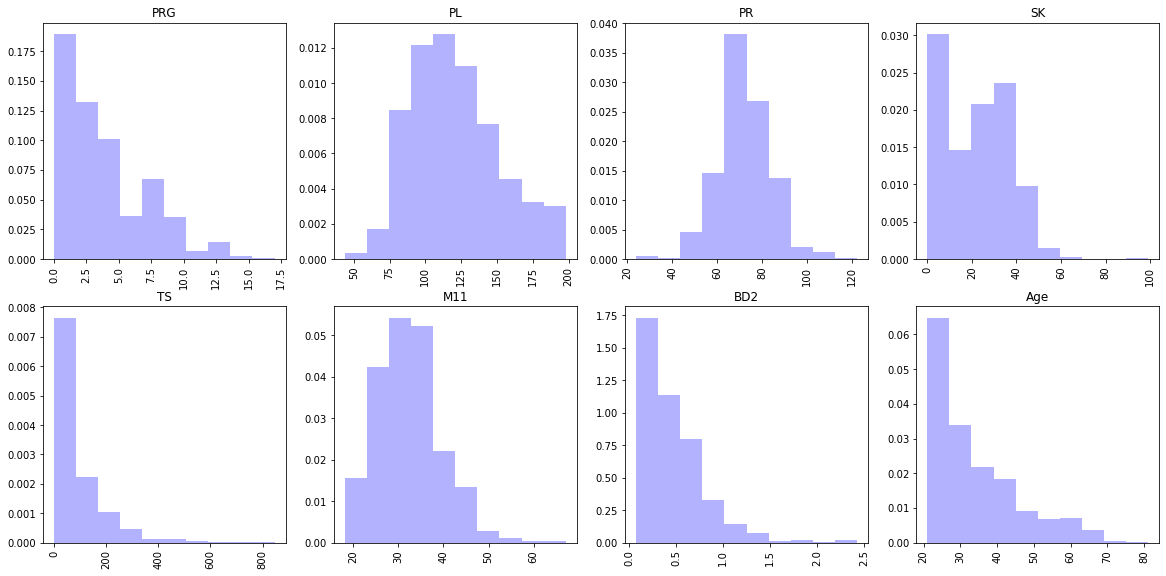

In [12]:
plt.figure(figsize=(20,20))
for i, col in enumerate(X.columns):
    plt.subplot(4,4,i+1)
    plt.hist(X[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

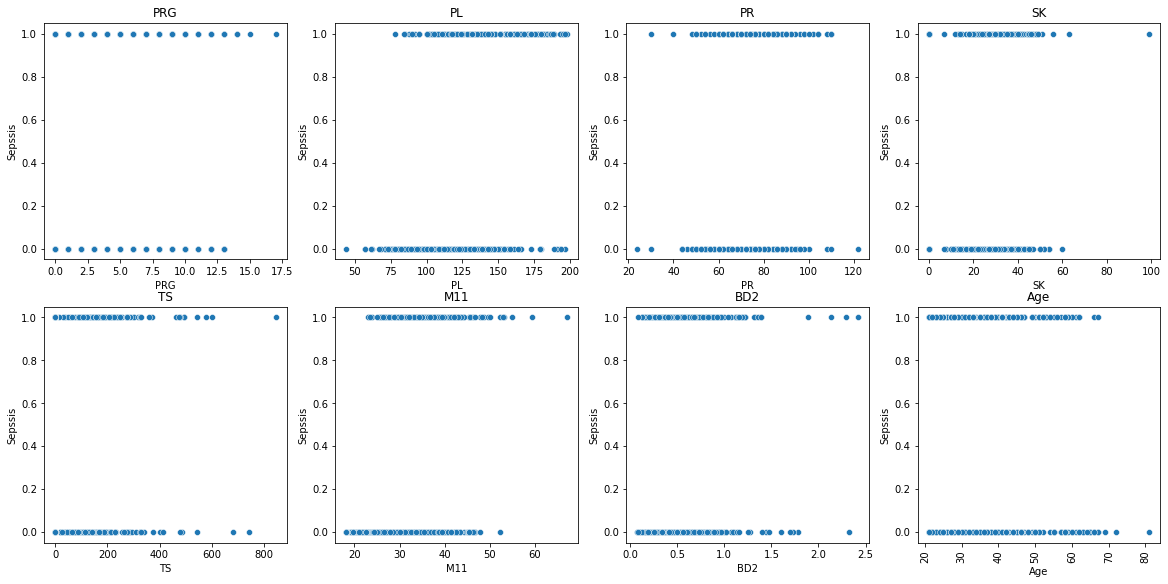

In [13]:
plt.figure(figsize=(20,20))
for i, col in enumerate(X.columns):
    plt.subplot(4,4,i+1)
    sns.scatterplot(data=X, x=col, y=Y.Sepssis)
    plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

Given the information presented in the scatterplots, PL and M11 seem to have the most correlation with the probability of having Sepsis.

In [14]:
# plt.figure(figsize=(20,20))
# for i, col in enumerate(X.columns):
#     plt.subplot(4,4,i+1)
#     ax = sns.boxplot(data=X, x=col, y=Y.Se
# #     plt.boxplot(X[col])
#     plt.xticks(rotation='vertical')
#     plt.title(col)

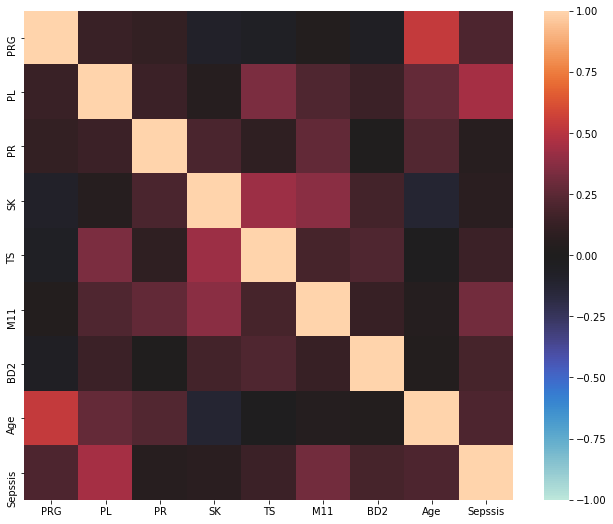

In [15]:
f, ax = plt.subplots(figsize=(11,9))
corr = PatientsTrainFrame.corr()
ax = sns.heatmap(
    data=corr,
    vmin=-1,
    vmax=1,
    center=0,
    square=True
)

## Feature Scaling

In [16]:
with pd.option_context('mode.chained_assignment', None):
#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
logNorm_attributes = ['PRG', 'SK', 'TS', 'M11', 'BD2', 'Age']
minmax_attributes = list(set(X.columns).difference(set(logNorm_attributes)))

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

minmaxscaler = MinMaxScaler().fit(X_train_scaled.loc[:, minmax_attributes])
X_train_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(X_train_scaled.loc[:, minmax_attributes])
X_test_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(X_test_scaled.loc[:, minmax_attributes])

powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(X_train.loc[:, logNorm_attributes])
X_train_scaled.loc[:, logNorm_attributes] = powertransformer.transform(X_train.loc[:, logNorm_attributes])
X_test_scaled.loc[:, logNorm_attributes] = powertransformer.transform(X_test.loc[:, logNorm_attributes])

minmaxscaler_pt = MinMaxScaler().fit(X_train_scaled.loc[:, logNorm_attributes])
X_train_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(X_train_scaled.loc[:, logNorm_attributes])
X_test_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(X_test_scaled.loc[:, logNorm_attributes])

In [18]:
print(logNorm_attributes)
print(minmax_attributes)

['PRG', 'SK', 'TS', 'M11', 'BD2', 'Age']
['PR', 'PL']


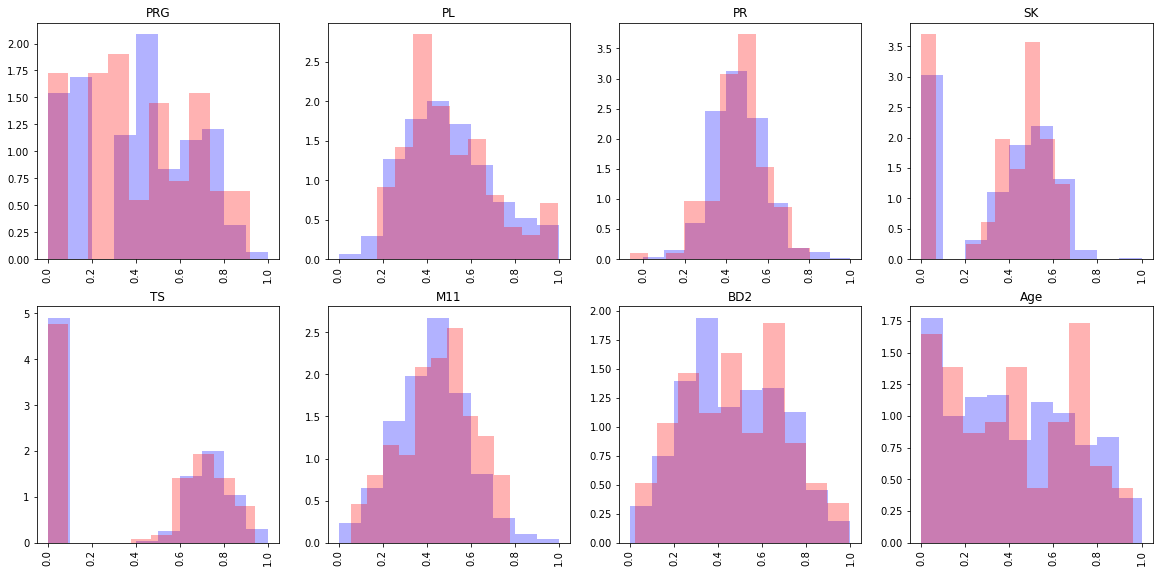

In [19]:
plt.figure(figsize=(20,20))
for i, col in enumerate(X_train_scaled.columns):
    plt.subplot(4,4,i+1)
    plt.hist(X_train_scaled[col], alpha=0.3, color='b', density=True)
    plt.hist(X_test_scaled[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')